### Testing of the code during development

Looking at the M1-1 dataset

In [1]:
import os
import glob
from oyv.imports import *
import importlib

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
%matplotlib inline

In [3]:
os.chdir('/home/oyvindl/work/code/git_public/sigpyproc/testing/development/')

In [4]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_funcs, sig_append, sig_calc
os.chdir('testing/development/')

In [5]:
# Load converted data from M1-1
floc = '/media/oyvindl/ratatosk/data/mooring_data/signature500/m1_1/converted/*'
flist = glob.glob(floc)
for fn in flist:
    if '_avgd' in fn:
        flist.remove(fn)

In [54]:
# RELOAD the sig_func module
#os.chdir('../../')
importlib.reload(sig_funcs)
importlib.reload(sig_append)
importlib.reload(sig_calc)

#os.chdir('testing/development/')

<module 'sigpyproc.sig_calc' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_calc.py'>

In [9]:
DX = sig_funcs.matfiles_to_dataset(flist[:2], )

/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:248: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(
/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:257: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(


170640 time points, 3555 ensembles. Sample per ensemble: 48
Done. Run sig_funcs.overview() to print some additional details.


In [ ]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(DX.Average_AltimeterPressure[:-100, 0])
ax[0].plot(DX.Average_Pressure[:-100, 0])
ax[1].plot(DX.Average_AltimeterPressure[:-100, 0] - DX.Average_Pressure[:-100, 0])
ax[1].plot(rs(DX.Average_AltimeterPressure[:-100, 0] - DX.Average_Pressure[:-100, 0], 71).mean)

In [ ]:
fig, ax = plt.subplots()#2, 1, sharex = True)

ax.hist(rs(DX.Average_AltimeterPressure[:-100, 0] - DX.Average_Pressure[:-100, 0], 71).mean, 30)

In [ ]:
os.chdir('/home/oyvindl/work/code/git_public/sigpyproc/testing/development/')

In [40]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_calc#, sig_append_external
os.chdir('testing/development/')

In [61]:
importlib.reload(sig_calc)
#importlib.reload(sig_calc)


<module 'sigpyproc.sig_calc' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_calc.py'>

In [55]:
DX = sig_append.set_lat(DX, 80)

In [62]:
DX = sig_calc.dep_from_p(DX)

WARNING!
Could not find atmospheric pressure (*p_atmo*) - not recommended continue if you plan to compute ice draft. 
--> (To add *p_atmo*, run sig_append.append_atm_pres()=

Depth calculation: Abort (A) or Continue (C): c
Continuing without atmospheric correction (careful!)..

No density (*rho_ocean*) field found. 
Enter "A" (Abort) or "C" (Continue using fixed rho = 1027 kg m-3): c
Continuing with fixed rho = 1027 kg m-3


In [63]:
DX.depth

<xarray.DataArray 'depth' (TIME: 3555, SAMPLE: 48)>
array([[20.677408  , 20.670475  , 20.66255   , ..., 20.677408  ,
        20.674435  , 20.663542  ],
       [20.674435  , 20.664534  , 20.673447  , ..., 20.718018  ,
        20.703161  , 20.70217   ],
       [20.760609  , 20.728914  , 20.677408  , ..., 20.71703   ,
        20.684343  , 20.669485  ],
       ...,
       [ 0.6883885 ,  0.69036955,  0.68937904, ...,  0.68937904,
         0.6883885 ,  0.69036955],
       [ 0.68937904,  0.69136   ,  0.6923505 , ...,  0.69036955,
         0.69334096,  0.6883885 ],
       [ 0.69334096,  0.6923505 ,  0.6943314 , ...,  0.6923505 ,
         0.69036955,  0.6943314 ]], dtype=float32)
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48
Attributes:
    units:      m
    long_name:  Transducer depth
    note:       Altimeter depth calculated from pressure (*Average_AltimeterP...

In [44]:
DX.g

<xarray.DataArray 'g' ()>
array(9.83061582)
Attributes:
    units:    ms-2
    note:     Calculated using gsw.grav() for p=0 and lat=80.00

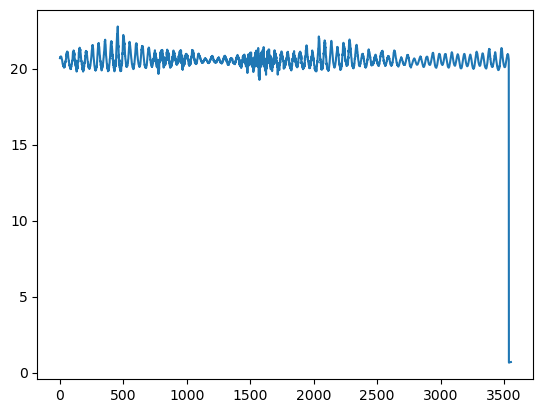

In [43]:
fig, ax = plt.subplots()
ax.plot(DX.depth[:, 0])

In [ ]:
DX.ICE_IN_SAMPLE

In [ ]:
fig, ax = plt.subplots(figsize = (16, 3))
ax.plot(rs(DX.SIC_FOM, 71).mean)
ax.plot(rs(DX.SIC_FOM_ALT, 71).mean, ':', alpha = 0.8)

In [ ]:
DX.SIC_FOM

In [ ]:
DX.lat

In [ ]:
imp.reload(sig_append)

In [ ]:
sig_append.lat(DX, 2)

In [ ]:
DX.var

In [ ]:
DX.SIC_FOM_ALT

In [ ]:
DX.sampling_interval_sec

In [ ]:
DX.Plan_ProfileInterval/60

In [ ]:
## Print some stuff with the overview() function
sig_funcs.overview(DX)

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0])
ax.plot(DX.Average_Pressure[:, 0])
ax.set_ylim()

In [ ]:
DX.A

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0]-DX.Average_Pressure[:, 0])

In [ ]:
DX.attrs

In [ ]:
ca()

In [ ]:
DX.Average_AltimeterDistanceAST

In [ ]:
nn = int(np.random.rand()*DX.dims['TIME'])
print(nn)
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterDistanceAST[nn, :])

In [ ]:
fig, ax = plt.subplots()
ax.hist(DX.Average_AltimeterQualityAST.to_numpy().flatten(), 100)

In [ ]:
DX

### Check that the time looks reasonable

In [ ]:
DX.dims['TIME']

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX['TIME'])

In [ ]:
from matplotlib.dates import num2date 

In [ ]:
def overview(DX):
    '''
    Prints some basic information about the dataset.
    '''

    # Time range
    datefmt = '%d %b %Y %H:%M'
    starttime = num2date(DX.TIME[0]).strftime(datefmt)
    endtime = num2date(DX.TIME[-1]).strftime(datefmt)
    ndays = DX.TIME[-1]-DX.TIME[0]

    print('\nTIME RANGE:\n%s  -->  %s  (%.1f days)'%(
        starttime, endtime, ndays))

    # Size
    print('\nSIZE:\nTotal %i time points.'%(DX.dims['TIME']*DX.dims['SAMPLE']))
    print('Split into %i ensembles with %i sample per ensemble.'%(
          DX.dims['TIME'], DX.dims['SAMPLE']))
    print('Ocean velocity bins: %i.'%(DX.dims['bins']))

In [ ]:
#### Have a look at the altimeter record

In [ ]:
DX.caonf

In [ ]:
overview(DX)

In [ ]:
num2date(DX.TIME[0])

In [ ]:
DX = sig_funcs.matfiles_to_dataset(flist, reshape = False)

In [ ]:
DXX = sig_funcs.reshape_ensembles(DX)

In [ ]:
os.chdir('../testing/basic_test/')

In [ ]:
ls

In [ ]:
DX

In [ ]:
mean_FOM = DX[nm].mean(axis = 1)


In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots(4, 1, sharex = True, sharey = True)
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    mean_FOM = DX[nm].mean(axis = 1)
    ax[nn-1].hist(mean_FOM/ mean_FOM.max(), 25, alpha = 0.8, )

In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots()
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    ax.plot(DX[nm].to_numpy().flatten()[sl]/ DX[nm].to_numpy().flatten()[sl].max()+(nn-1)*1.1, 'o', alpha = 0.1)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.hist(DX.AverageIce_FOMBeam1.to_numpy().flatten(), 1000)

In [ ]:
ice_class_FOM(DX, threshold = 500)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.plot(DX.to_array())

In [ ]:
def ice_class_from_FOM(DX, FOM_thr = 300)